## [Home Loan Prediction](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement)

## Import libraries & read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
# read datasets 
train = pd.read_csv('train_ctrUa4K.csv')  
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
# # drop duplicate rows, if any - no duplicates found
# print(train.shape)
# train =train.drop_duplicates(subset = None, keep = 'first')
# print(train.shape)

# print(test.shape)
# test =test.drop_duplicates(subset = None, keep = 'first')
# print(test.shape)

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Missing value treatment

In [5]:
# check for missing values in test + train dataset
print(train.isnull().sum())
print("")
print(test.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [6]:
# compare test-train datasets ; similar values, can combine for missing value treatment
#print(train.describe())
#print(test.describe())

In [7]:
#combine train and test for missing value treatment 

train['source'] = 'train'
test['source'] = 'test'
test['Loan_Status'] = np.nan # emply column for test dataset (we have to predict this)

frames = [test,train]
combined = pd.concat(frames, sort = False)

In [8]:
# missing values as % of nrows
per_missing = round((combined.drop('Loan_Status',axis =1).isnull().sum()/combined.drop('Loan_Status',axis = 1).isnull().count())*100,1)
print('% Missing Values for each column :')
per_missing.sort_values(ascending = False)

% Missing Values for each column :


Credit_History       8.1
Self_Employed        5.6
LoanAmount           2.8
Dependents           2.5
Gender               2.4
Loan_Amount_Term     2.0
Married              0.3
source               0.0
Property_Area        0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Education            0.0
Loan_ID              0.0
dtype: float64

In [10]:
# replace non-numeric with mode, replace numeric with median

#median 
combined.loc[:,'Credit_History'].fillna(combined.loc[:,'Credit_History'].median(),inplace = True)
combined.loc[:,'LoanAmount'].fillna(combined.loc[:,'LoanAmount'].median(),inplace = True)
combined.loc[:,'Loan_Amount_Term'].fillna(combined.loc[:,'Loan_Amount_Term'].median(),inplace = True)

#mode
combined.loc[:,'Self_Employed'].fillna(combined.loc[:,'Self_Employed'].mode()[0],inplace = True)
combined.loc[:,'Dependents'].fillna(combined.loc[:,'Dependents'].mode()[0],inplace = True)
combined.loc[:,'Gender'].fillna(combined.loc[:,'Gender'].mode()[0],inplace = True)
combined.loc[:,'Married'].fillna(combined.loc[:,'Married'].mode()[0],inplace = True)


per_missing = round((combined.drop('Loan_Status',axis =1).isnull().sum()/combined.drop('Loan_Status',axis = 1).isnull().count())*100,1)
print('% Missing Values for each column :')
per_missing.sort_values(ascending = False)

% Missing Values for each column :


source               0.0
Property_Area        0.0
Credit_History       0.0
Loan_Amount_Term     0.0
LoanAmount           0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Self_Employed        0.0
Education            0.0
Dependents           0.0
Married              0.0
Gender               0.0
Loan_ID              0.0
dtype: float64

## EDA with Visuals
### Plotting Loan Status vs Other Variables 

In [10]:
# separate train from combined for visualization
train = combined.loc[combined.source == 'train'].copy() #add copy() to create copy instead of view

train.shape

(614, 14)

### Categorical Variables

In [11]:
# gender
eda_gender_proportion = round(pd.crosstab(train.loc[:,'Gender'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# married
eda_married_proportion = round(pd.crosstab(train.loc[:,'Married'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# dependents
eda_dependents_proportion = round(pd.crosstab(train.loc[:,'Dependents'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# education
eda_education_proportion = round(pd.crosstab(train.loc[:,'Education'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# employment
eda_self_employed_proportion = round(pd.crosstab(train.loc[:,'Self_Employed'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# property
eda_self_property_proportion = round(pd.crosstab(train.loc[:,'Property_Area'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# credit history
eda_credit_proportion = round(pd.crosstab(train.loc[:,'Credit_History'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

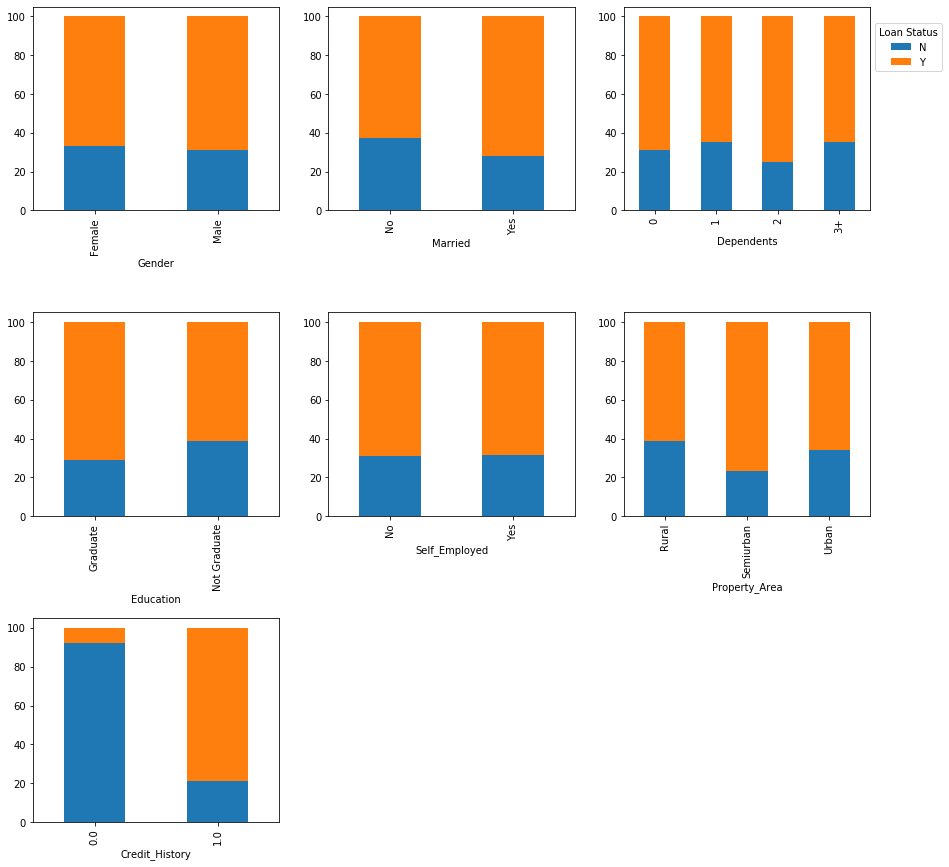

In [12]:
fig, axes = plt.subplots(3,3)
fig.set_size_inches(15, 15)

p1 = eda_gender_proportion.plot.bar(stacked=True,ax = axes[0,0])
p2 = eda_married_proportion.plot.bar(stacked=True,ax = axes[0,1])
p3 = eda_dependents_proportion.plot.bar(stacked=True,ax = axes[0,2])
p4 = eda_education_proportion.plot.bar(stacked=True,ax = axes[1,0])
p5 = eda_self_employed_proportion.plot.bar(stacked=True,ax = axes[1,1])
p6 = eda_self_property_proportion.plot.bar(stacked=True,ax = axes[1,2])
p7 = eda_credit_proportion.plot.bar(stacked=True,ax = axes[2,0])


p1.get_legend().remove()
p2.get_legend().remove()
#p3.get_legend().remove() #modify p3 legend to mark loan_status outside the graph
p4.get_legend().remove()
p5.get_legend().remove()
p6.get_legend().remove()
p7.get_legend().remove()

plt.subplots_adjust(hspace = 0.5)
p3.legend(loc='center left', bbox_to_anchor=(1,0.8),title = 'Loan Status') #modifying p3 legend

fig.delaxes(axes[2,1]) #deleting additional empty graph areas 
fig.delaxes(axes[2,2])

### Continuous Variables

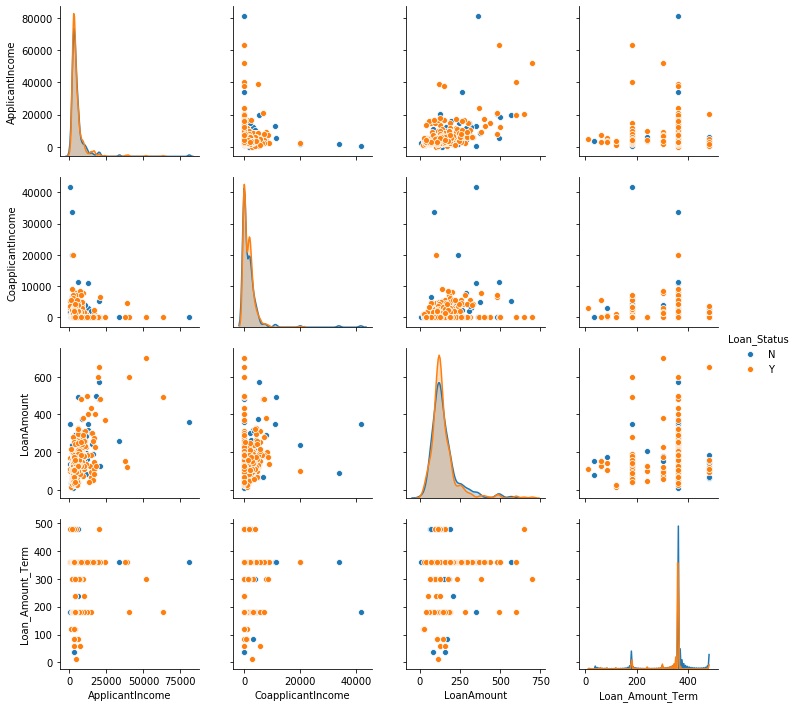

In [13]:
# pairplot between continuous variables ; hue_order set manually to match legend of above charts (categorical variable)
# plots not very conclusive, so create bins and then visualize 
sns.pairplot(train.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']], hue = 'Loan_Status',hue_order = ['N','Y'])

In [14]:
#create bins - bucket continuous variables, plot by Loan_Status 

# ApplicantIncome 

# train.loc[:,'ApplicantIncome'].max() #- 81000
# train.loc[:,'ApplicantIncome'].min() #- 150
# train.loc[:,'ApplicantIncome'].mean() #- 5403
# train.loc[:,'ApplicantIncome'].median() #- 3813

bins_applicant=[0,3000,6000,9000,81000]
group_applicant=['Low','Medium','High','Very High']
train['ApplicantIncome_bin']=pd.cut(train['ApplicantIncome'],bins_applicant,labels=group_applicant,include_lowest =True)


# print(train.groupby('ApplicantIncome_bin')['Loan_ID'].count())
# print(train.groupby('ApplicantIncome_bin')['ApplicantIncome'].mean())


# # CoapplicantIncome 

# train.loc[:,'CoapplicantIncome'].max() #- 41667
# train.loc[:,'CoapplicantIncome'].min() #- 0
# train.loc[:,'CoapplicantIncome'].mean() #- 1621
# train.loc[:,'CoapplicantIncome'].median() #- 1189

bins_coapplicant=[0,1000,2000,4000,41667]
group_coapplicant=['Low','Medium','High','Very High']
train['CoapplicantIncome_bin']=pd.cut(train.loc[:,'CoapplicantIncome'],bins_coapplicant,labels=group_coapplicant,include_lowest = True)


# print(train.groupby('CoapplicantIncome_bin')['Loan_ID'].count())
# print(train.groupby('CoapplicantIncome_bin')['CoapplicantIncome'].mean())

# # LoanAmount

# train.loc[:,'LoanAmount'].max() #- 700
# train.loc[:,'LoanAmount'].min() #- 9
# train.loc[:,'LoanAmount'].mean() #- 146
# train.loc[:,'LoanAmount'].median() #- 128

bins_loan_amt=[0,100,200,700]
group_loan_amt=['Low','Medium','High']
train['LoanAmount_bin']=pd.cut(train.loc[:,'LoanAmount'],bins_loan_amt,labels=group_loan_amt,include_lowest = True)


# print(train.groupby('LoanAmount_bin')['Loan_ID'].count())
# print(train.groupby('LoanAmount_bin')['LoanAmount'].mean())


# Loan_Amount_Term

# train.loc[:,'Loan_Amount_Term'].max() #- 480
# train.loc[:,'Loan_Amount_Term'].min() #- 12
# train.loc[:,'Loan_Amount_Term'].mean() #- 342
# train.loc[:,'Loan_Amount_Term'].median() #- 360

bins_loan_term=[0,300,480]
group_loan_term=['<300 months ','> 300 months']
train['Loan_Amount_Term_bin']=pd.cut(train.loc[:,'Loan_Amount_Term'],bins_loan_term,labels=group_loan_term,include_lowest = True)


# print(train.groupby('Loan_Amount_Term_bin')['Loan_ID'].count())
# print(train.groupby('Loan_Amount_Term_bin')['Loan_Amount_Term'].mean())

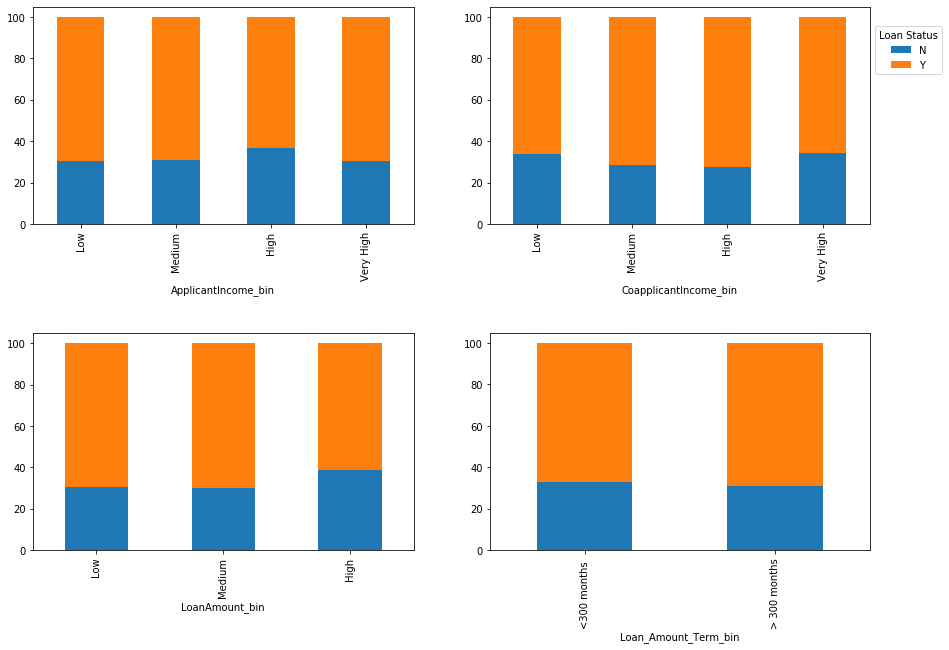

In [15]:

eda_applicant_proportion = round(pd.crosstab(train.loc[:,'ApplicantIncome_bin'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)
eda_coapplicant_proportion = round(pd.crosstab(train.loc[:,'CoapplicantIncome_bin'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)
eda_loan_amt_proportion = round(pd.crosstab(train.loc[:,'LoanAmount_bin'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)
eda_loan_term_proportion = round(pd.crosstab(train.loc[:,'Loan_Amount_Term_bin'],train.loc[:,'Loan_Status']).apply(lambda r: r/r.sum(), axis=1)*100,1)

# print(eda_applicant_proportion)
# print(eda_coapplicant_proportion)
# print(eda_loan_amt_proportion)
# print(eda_loan_term_proportion)


fig, axes = plt.subplots(2,2)
fig.set_size_inches(15, 10)

p1 = eda_applicant_proportion.plot.bar(stacked=True,ax = axes[0,0])
p2 = eda_coapplicant_proportion.plot.bar(stacked=True,ax = axes[0,1])
p3 = eda_loan_amt_proportion.plot.bar(stacked=True,ax = axes[1,0])
p4 = eda_loan_term_proportion.plot.bar(stacked=True,ax = axes[1,1])


p1.get_legend().remove()
p2.get_legend().remove() #modify p2 legend to mark loan_status outside the graph
p3.get_legend().remove() 
p4.get_legend().remove()

plt.subplots_adjust(hspace = 0.5)
p2.legend(loc='center left', bbox_to_anchor=(1,0.8),title = 'Loan Status') #modifying p2 legend

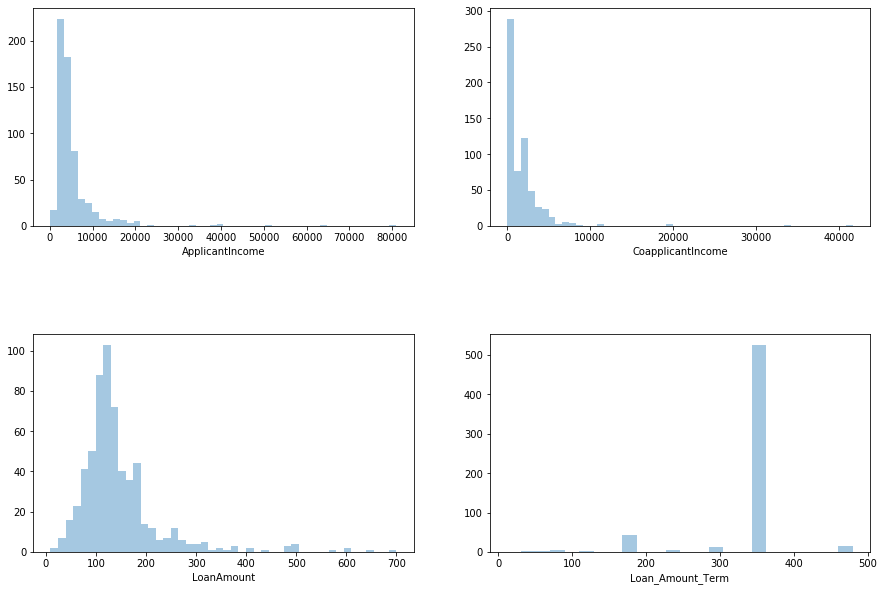

In [16]:
# check data skewness 

fig, axes = plt.subplots(2,2)
fig.set_size_inches(15, 10)

cp1 = sns.distplot(train.loc[:,'ApplicantIncome'],ax = axes[0,0],kde = False)
cp2 = sns.distplot(train.loc[:,'CoapplicantIncome'],ax = axes[0,1],kde = False)
cp3 = sns.distplot(train.loc[:,'LoanAmount'],ax = axes[1,0],kde = False)
cp4 = sns.distplot(train.loc[:,'Loan_Amount_Term'], ax = axes[1,1],kde = False)

plt.subplots_adjust(hspace = 0.5)

In [17]:
# CoapplicantIncome has a lot of zeroes, check proportion
print('Proportion of entries where Coapplicant Income is zero:',round(train.loc[:,'CoapplicantIncome'][train.CoapplicantIncome==0].count()/train.loc[:,'CoapplicantIncome'].count()*100,1),'%')

Proportion of entries where Coapplicant Income is zero: 44.5 %


## Feature Engineering 
#### It is done on imputed combined dataset so that we don't have to repeat for test/train individually -> has its drawbacks, but we'll keep it simple for this problem

In [11]:
# Feature 1 
#Total Household Income = Applicant Income + CoApplicant Income 
combined['TotalIncome'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']

In [12]:
# Feature 2
# EMI : [P x R x (1+R)^N]/[(1+R)^N-1] ; assume 8% p.a rate of interest 

P = combined.loc[:,'LoanAmount']
R = 0.08
N = combined.loc[:,'Loan_Amount_Term']

combined['EMI'] = (P*R*(1+R)**N)/((1+R)**(N-1))

combined['EMI'].head()

0     9.5040
1    10.8864
2    17.9712
3     8.6400
4     6.7392
Name: EMI, dtype: float64

In [13]:
# Feature 3
# Loan Amount to Income Ratio
combined['Loan_to_income'] = combined.loc[:,'LoanAmount']/combined.loc[:,'TotalIncome']

In [14]:
# drop extra columns 
combined = combined.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],axis = 1)

### One Hot Encoding for categorical variables

In [42]:
# convert Loan_Status, Source into numeric before applying encoding

combined['Loan_Status'].replace('Y',1,inplace = True)
combined['Loan_Status'].replace('N',0,inplace = True)

combined['source'].replace('train',0,inplace = True)
combined['source'].replace('test',1,inplace = True)

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
Gender            981 non-null object
Married           981 non-null object
Dependents        981 non-null object
Education         981 non-null object
Self_Employed     981 non-null object
LoanAmount        981 non-null float64
Credit_History    981 non-null float64
Property_Area     981 non-null object
source            981 non-null int64
Loan_Status       614 non-null float64
TotalIncome       981 non-null float64
EMI               981 non-null float64
Loan_to_income    981 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 107.3+ KB


In [71]:
# one hot encoding 
combined_onehot = pd.get_dummies(combined)

# we only need n-1 columns ; for example, if there are two genders, M & F, if Gender_Male column is 1, we don't need another Gender_Female column as it will always be zero for this record
# drop redundant one hot encoded columns 

combined_onehot = combined_onehot.drop(['Gender_Male','Married_No','Dependents_3+','Education_Not Graduate','Self_Employed_Yes','Property_Area_Urban'],axis = 1)


In [26]:
combined_onehot.head()

,LoanAmount,Credit_History,source,Loan_Status,TotalIncome,EMI,Loan_to_income,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban
0,110.0,1.0,1,NaN,5720.0,9.5040,0.019231,0,1,1,0,0,1,1,0,0
1,126.0,1.0,1,NaN,4576.0,10.8864,0.027535,0,1,0,1,0,1,1,0,0
2,208.0,1.0,1,NaN,6800.0,17.9712,0.030588,0,1,0,0,1,1,1,0,0
3,100.0,1.0,1,NaN,4886.0,8.6400,0.020467,0,1,0,0,1,1,1,0,0
4,78.0,1.0,1,NaN,3276.0,6.7392,0.023810,0,0,1,0,0,0,1,0,0


### Model 1 - Logistic Regression

Log Transform the numerical variables, followed by Standardizing 

In [72]:
# log transform numeric variables

# Loan Amount 
combined_onehot['LoanAmount_log'] = np.log(1+combined_onehot.loc[:,'LoanAmount'])

# Total Income 
combined_onehot['TotalIncome_log'] = np.log(1+combined_onehot.loc[:,'TotalIncome'])

# EMI 
combined_onehot['EMI_log'] = np.log(1+combined_onehot.loc[:,'EMI'])

# Loan To Income 
combined_onehot['Loan_to_income_log'] = np.log(1+combined_onehot.loc[:,'Loan_to_income'])

# drop orignal non-transformed variables
combined_onehot = combined_onehot.drop(['LoanAmount','TotalIncome','EMI','Loan_to_income'],axis = 1)

In [101]:
# scaling data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

features_to_be_scaled = ['LoanAmount_log','TotalIncome_log','EMI_log','Loan_to_income_log']

combined_onehot.loc[:,features_to_be_scaled] = scaler.fit_transform(combined_onehot.loc[:,features_to_be_scaled])


In [102]:
print(combined_onehot.loc[:,features_to_be_scaled].mean()) # should be 0 if standard scalar, robust scalar ignores outliers for the calulations
print(combined_onehot.loc[:,features_to_be_scaled].std()) # should be 1, if standard scalar, robust scalar ignores outliers for the calulations

LoanAmount_log        0.022442
TotalIncome_log       0.127800
EMI_log               0.041616
Loan_to_income_log   -0.015581
dtype: float64
LoanAmount_log        1.014366
TotalIncome_log       0.926324
EMI_log               0.999622
Loan_to_income_log    0.977583
dtype: float64


In [103]:
# separate test and train before modeling 


train_model = combined_onehot[combined_onehot['source'] == 0].copy()
train_model = train_model.drop(['source'],axis = 1).copy()

test_model = combined_onehot[combined_onehot['source'] == 1].copy()
test_model = test_model.drop(['source','Loan_Status'],axis = 1).copy()


In [104]:
# store feature matrix and response vector in two different datasets 
train_features = train_model.loc[:,train_model.columns != 'Loan_Status'].copy()
train_labels = np.ravel(train_model.loc[:,train_model.columns == 'Loan_Status'].copy()) #ravel() converts df y to flattened array

##### [Refer : Kaggle Notebook](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python)

#### Model 1.1 : Logistic Refression Using Test/Train split

Train/Test split results:
LogisticRegression accuracy is 0.829
LogisticRegression log_loss is 0.437
LogisticRegression auc is 0.821


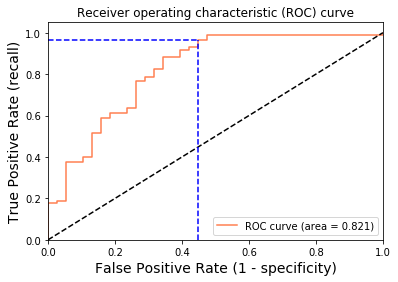

Using a threshold of 0.668 guarantees a sensitivity of 0.965 and a specificity of 0.553, i.e. a false positive rate of 44.74%.


In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# store feature matrix and response vector in two different datasets 
train_features = train_model.loc[:,train_model.columns != 'Loan_Status'].copy()
train_labels = np.ravel(train_model.loc[:,train_model.columns == 'Loan_Status'].copy()) #ravel() converts df y to flattened array


X_train, X_validate, y_train, y_validate = train_test_split(train_features, train_labels, test_size=0.2, random_state=3,stratify = y)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_validate)
y_pred_proba = logreg.predict_proba(X_validate)[:, 1]
[fpr, tpr, thr] = roc_curve(y_validate, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_validate, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_validate, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [119]:
# output file
pred_test = logreg.predict(test_model)
pred_test_df = pd.DataFrame()
pred_test_df['Loan_ID'] = test['Loan_ID']
pred_test_df['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(pred_test)
pred_test_df[['Loan_ID','Loan_Status']].to_csv('new_simple_logistic.csv',index=False)

#### Model 1.2 Logistic Regression using GridSearchCV (multiple scorers)

best params: LogisticRegression(C=0.20001000000000002, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.20001000000000002}
best score: 0.8110749185667753


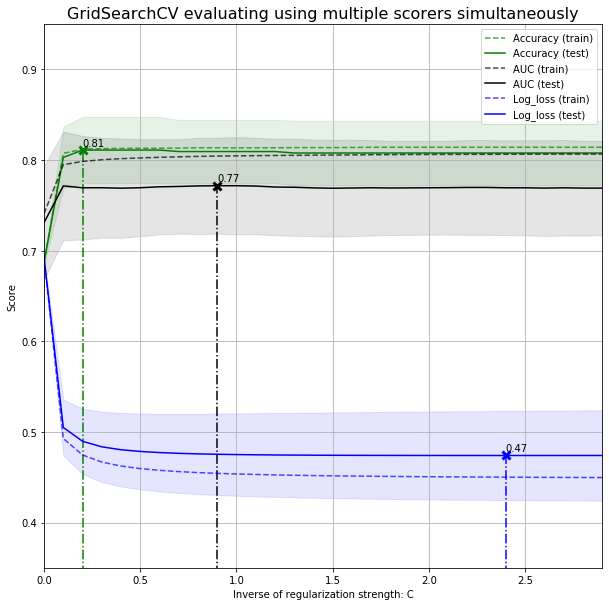

In [107]:
from sklearn.model_selection import GridSearchCV

X = train_features
y = train_labels

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [108]:
# output file
pred_test = gs.predict(test_model)
pred_test_df = pd.DataFrame()
pred_test_df['Loan_ID'] = test['Loan_ID']
pred_test_df['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(pred_test)
pred_test_df[['Loan_ID','Loan_Status']].to_csv('new_GSCV_logistic.csv',index=False)

### Model 2 - Random Forest (w/ GridSearchCV)

##### [Refer : Kaggle Notebook](https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook)

Transformation/Scaling not very critical for tree based algorithms, but let's use the same dataset

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train_features, train_labels)


print(gs.best_score_)
print(gs.best_params_)


0.8127035830618893
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [143]:

print(gs.best_score_)
print(gs.best_params_)



0.8127035830618893
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [145]:
# train rf model using the best_params_ from gridsearch

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=50,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_features, train_labels)
print("%.4f" % rf.oob_score_)

0.8029


In [146]:
pd.concat((pd.DataFrame(train_features.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
0,Credit_History,0.300583
11,TotalIncome_log,0.154751
13,Loan_to_income_log,0.147284
12,EMI_log,0.124160
10,LoanAmount_log,0.121719
2,Married_Yes,0.023430
9,Property_Area_Semiurban,0.022315
6,Education_Graduate,0.019810
1,Gender_Female,0.015847
8,Property_Area_Rural,0.015277


In [147]:
# output file
pred_test = rf.predict(test_model)
pred_test_df = pd.DataFrame()
pred_test_df['Loan_ID'] = test['Loan_ID']
pred_test_df['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(pred_test)
pred_test_df[['Loan_ID','Loan_Status']].to_csv('new_rf_GSCV.csv',index=False)

### Model 2 - xGBoost (w/ GridSearchCV)

In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer


param_test = {
    'n_estimators': [10,50,100],
    'max_depth': [3,5,7],
    'min_child_weight': [1,3],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[0.5,0.75,1],
    'colsample_bytree':[0.5,0.75,1],
    'learning_rate': [0.01, 0.05, 0.1]
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = param_test, 
                       scoring=scoring,
                       iid=False,
                       cv=5, 
                       verbose = 1, 
                       refit='Accuracy',
                       n_jobs = -1)

gss.fit(train_features, train_labels)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 3438 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 7638 tasks      | elapsed:   25.5s


40.968947649002075


[Parallel(n_jobs=-1)]: Done 12150 out of 12150 | elapsed:   40.8s finished


In [162]:
print(gs.best_score_)
print(gs.best_params_)

0.8193283976731888
{'colsample_bytree': 0.75, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 1}


In [178]:
# train xBG model using the best_params_ from gridsearch

# split into train and validate
X_train, X_validate, y_train, y_validate = train_test_split(train_features, train_labels, test_size=0.2, random_state=3,stratify = y)

# train xBG on train
from xgboost import XGBClassifier

xGB = XGBClassifier(colsample_bytree=0.75, 
                             gamma=0.0,
                             learning_rate=0.05,
                             max_depth=3,
                             min_child_weight=3,
                             n_estimators=10,
                             subsample = 1,
                             random_state=1,
                             n_jobs=-1)

xGB.fit(X_train, y_train)

# predict validate

y_pred = xGB.predict(X_validate)
y_pred_proba = xGB.predict_proba(X_validate)[:, 1]

[fpr, tpr, thr] = roc_curve(y_validate, y_pred_proba)
print('Train/Test split results:')
print(xGB.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_validate, y_pred))
print(xGB.__class__.__name__+" log_loss is %2.3f" % log_loss(y_validate, y_pred_proba))
print(xGB.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
XGBClassifier accuracy is 0.813
XGBClassifier log_loss is 0.570
XGBClassifier auc is 0.820


In [179]:
# output file
pred_test = xGB.predict(test_model)
pred_test_df = pd.DataFrame()
pred_test_df['Loan_ID'] = test['Loan_ID']
pred_test_df['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(pred_test)
pred_test_df[['Loan_ID','Loan_Status']].to_csv('new_xGB_GSCV.csv',index=False)

## Models with Mean Encoding (non-regularized)

In [92]:
# convert Loan_Status, Source into numeric before applying encoding

combined['Loan_Status'].replace('Y',1,inplace = True)
combined['Loan_Status'].replace('N',0,inplace = True)

combined['source'].replace('train',0,inplace = True)
combined['source'].replace('test',1,inplace = True)

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
Gender            981 non-null object
Married           981 non-null object
Dependents        981 non-null object
Education         981 non-null object
Self_Employed     981 non-null object
LoanAmount        981 non-null float64
Credit_History    981 non-null float64
Property_Area     981 non-null object
source            981 non-null int64
Loan_Status       614 non-null float64
TotalIncome       981 non-null float64
EMI               981 non-null float64
Loan_to_income    981 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 107.3+ KB


In [93]:
# separate test and train before modeling 

train_model = combined[combined['source'] == 0].copy()
train_model = train_model.drop(['source'],axis = 1).copy()

test_model = combined[combined['source'] == 1].copy()
test_model = test_model.drop(['source','Loan_Status'],axis = 1).copy()


In [129]:
cols_mean_encoded = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [164]:
train_mean_encoded = train_model
test_mean_encoded = test_model

for col in cols_mean_encoded:
    mean = train_mean_encoded.groupby(col)['Loan_Status'].mean()
    train_mean_encoded['mean_encoded_'+col] =train_mean_encoded.loc[:,col].map(mean)
    test_mean_encoded['mean_encoded_'+col] =test_mean_encoded.loc[:,col].map(mean)

# drop original columns 

train_mean_encoded = train_mean_encoded.drop(cols_mean_encoded,axis = 1)
test_mean_encoded = test_mean_encoded.drop(cols_mean_encoded,axis = 1)


,mean_encoded_Property_Area
Property_Area,
Rural,0.614525
Semiurban,0.768240
Urban,0.658416


In [165]:
# store feature matrix and response vector in two different datasets 
train_features = train_mean_encoded.loc[:,train_mean_encoded.columns != 'Loan_Status'].copy()
train_labels = np.ravel(train_mean_encoded.loc[:,train_mean_encoded.columns == 'Loan_Status'].copy()) #ravel() converts df y to flattened array

In [166]:
# train, validate split
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(train_features, train_labels, test_size=0.2, random_state=3)

#### RandomForest with GridSearchCV

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train_features, train_labels)


print(gs.best_score_)
print(gs.best_params_)


0.8094462540716613
{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}


In [170]:
# train rf model using the best_params_ from gridsearch

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             min_samples_split=12,
                             min_samples_leaf=5,
                             max_features='auto',
                             oob_score=True,
                             n_jobs=-1)
rf.fit(train_features, train_labels)
print("%.4f" % rf.oob_score_)

0.8127


In [171]:
pd.concat((pd.DataFrame(train_features.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
1,Credit_History,0.460190
4,Loan_to_income,0.139338
2,TotalIncome,0.120958
0,LoanAmount,0.085872
3,EMI,0.082272
10,mean_encoded_Property_Area,0.041973
7,mean_encoded_Dependents,0.019503
6,mean_encoded_Married,0.019228
8,mean_encoded_Education,0.014350
5,mean_encoded_Gender,0.010781


In [172]:
# output file
pred_test = rf.predict(test_mean_encoded)
pred_test_df = pd.DataFrame()
pred_test_df['Loan_ID'] = test['Loan_ID']
pred_test_df['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(pred_test)
pred_test_df[['Loan_ID','Loan_Status']].to_csv('new_rf_GSCV_encoded.csv',index=False)

#### xGB with GridSearchCV

In [175]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_curve


param_test = {
    'n_estimators': [10,50,100],
    'max_depth': [3,5,7],
    'min_child_weight': [1,3],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[0.5,0.75,1],
    'colsample_bytree':[0.5,0.75,1],
    'learning_rate': [0.01, 0.05, 0.1]
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = param_test, 
                       scoring=scoring,
                       iid=False,
                       cv=5, 
                       verbose = 1, 
                       refit='Accuracy',
                       n_jobs = -1)

gs.fit(train_features, train_labels)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4106 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 9006 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 12150 out of 12150 | elapsed:   35.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3],
                         '

In [176]:
print(gs.best_score_)
print(gs.best_params_)

0.8193283976731888
{'colsample_bytree': 1, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 1}


In [180]:
# train xBG model using the best_params_ from gridsearch
from sklearn.metrics import make_scorer, accuracy_score, roc_curve,log_loss,auc
# split into train and validate
X_train, X_validate, y_train, y_validate = train_test_split(train_features, train_labels, test_size=0.2, random_state=3,stratify = y)

# train xBG on train
xGB = XGBClassifier(colsample_bytree=1, 
                             gamma=0.0,
                             learning_rate=0.01,
                             max_depth=3,
                             min_child_weight=3,
                             n_estimators=50,
                             subsample = 1,
                             n_jobs=-1)

xGB.fit(X_train, y_train)

# predict validate

y_pred = xGB.predict(X_validate)
y_pred_proba = xGB.predict_proba(X_validate)[:, 1]

[fpr, tpr, thr] = roc_curve(y_validate, y_pred_proba)
print('Train/Test split results:')
print(xGB.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_validate, y_pred))
print(xGB.__class__.__name__+" log_loss is %2.3f" % log_loss(y_validate, y_pred_proba))
print(xGB.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
XGBClassifier accuracy is 0.813
XGBClassifier log_loss is 0.559
XGBClassifier auc is 0.781


In [181]:
# output file
pred_test = xGB.predict(test_mean_encoded)
pred_test_df = pd.DataFrame()
pred_test_df['Loan_ID'] = test['Loan_ID']
pred_test_df['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(pred_test)
pred_test_df[['Loan_ID','Loan_Status']].to_csv('new_xGB_GSCV_encoded.csv',index=False)